In [1]:
import cdshealpix
cdshealpix.__version__

'0.3.0'

In [2]:
from mocpy import MOC, WCS
import astropy.units as u
from astropy.coordinates import SkyCoord, Angle

In [3]:
import numpy as np

ipix = np.arange(12*4**3, dtype=np.uint64)
depth = 3
delta_depth = 2

In [4]:
help(cdshealpix.external_neighbours)
edges, corners = cdshealpix.external_neighbours(ipix, depth, delta_depth)

Help on function external_neighbours in module cdshealpix.healpix:

external_neighbours(ipix, depth, delta_depth)
    Get the neighbours of specific healpix cells
    
    This method returns two arrays. One containing the healpix cells
    located on the external borders of the cells (at depth: `depth` + `delta_depth`).
    The other containing the healpix cells located on the external corners of the cells
    (at depth: `depth` + `delta_depth`). Please note that some pixels do not have 4 external corners
    e.g. the 12 base pixels have each only 2 external corners.
    
    Parameters
    ----------
    ipix : `numpy.array`
        The healpix cells from which the external neighbours will be computed
    depth : int
        The depth of the input healpix cells
    delta_depth : int
        The depth of the returned external neighbours will be equal to: `depth` + `delta_depth`
    
    Returns
    -------
    external_border_cells, external_corner_cells : (`numpy.array`, `numpy.array

In [5]:
ipix_corner_cells=corners[corners >= 0].ravel().astype(np.int)
ipix_border_cells=edges.ravel().astype(np.int)

In [6]:
help(MOC.from_healpix_cells)

Help on method from_healpix_cells in module mocpy.moc.moc:

from_healpix_cells(ipix, depth, fully_covered=None) method of builtins.type instance
    Creates a MOC from a set of HEALPix cells at a given depth.
    
    Parameters
    ----------
    ipix : `numpy.ndarray`
        HEALPix cell indices. dtype must be np.uint64
    depth : `numpy.ndarray`
        Depth of the HEALPix cells. Must be of the same size of `ipix`.
        dtype must be np.uint8
    fully_covered : `numpy.ndarray`, optional
        HEALPix cells coverage flags. This flag informs whether a cell is
        fully covered by a cone (resp. polygon, elliptical cone) or not.
        Must be of the same size of `ipix`.
    
    Raises
    ------
    IndexError
        When `ipix`, `depth` and `fully_covered` do not have the same shape
    
    Returns
    -------
    moc : `~mocpy.moc.MOC`
        The MOC



In [7]:
# Create the moc from corner cells
depth_corner_cells = np.ones(ipix_corner_cells.shape, dtype=np.uint8) * (depth + delta_depth)
moc_from_corner_cells = MOC.from_healpix_cells(ipix_corner_cells, depth_corner_cells)

In [8]:
# Create the moc from border cells
depth_border_cells = np.ones(ipix_border_cells.shape, dtype=np.uint8) * (depth + delta_depth)
moc_from_border_cells = MOC.from_healpix_cells(ipix_border_cells, depth_border_cells)

/home/baumann/.local/lib/python3.6/site-packages/astropy/visualization/wcsaxes/grid_paths.py:73: RuntimeWarning: invalid value encountered in greater
  discontinuous = step[1:] > DISCONT_FACTOR * step[:-1]
/home/baumann/.local/lib/python3.6/site-packages/astropy/visualization/wcsaxes/grid_paths.py:73: RuntimeWarning: invalid value encountered in greater
  discontinuous = step[1:] > DISCONT_FACTOR * step[:-1]
/home/baumann/.local/lib/python3.6/site-packages/astropy/visualization/wcsaxes/grid_paths.py:73: RuntimeWarning: invalid value encountered in greater
  discontinuous = step[1:] > DISCONT_FACTOR * step[:-1]
/home/baumann/.local/lib/python3.6/site-packages/astropy/visualization/wcsaxes/grid_paths.py:73: RuntimeWarning: invalid value encountered in greater
  discontinuous = step[1:] > DISCONT_FACTOR * step[:-1]


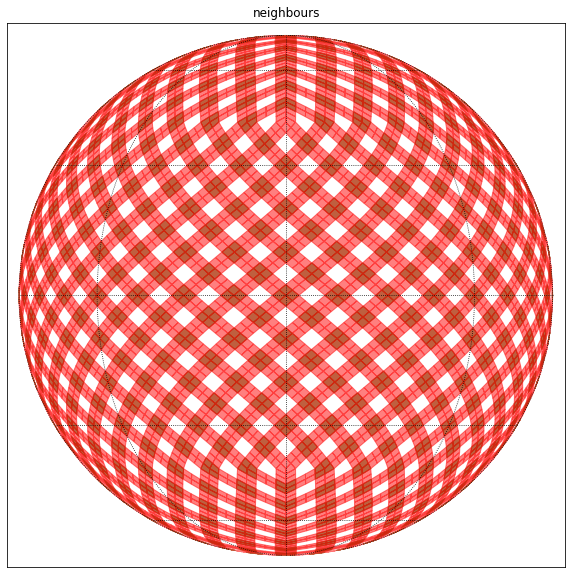

In [9]:
# Plot the MOC using matplotlib
import matplotlib.pyplot as plt
fig = plt.figure(111, figsize=(10, 10))
# Define a astropy WCS from the mocpy.WCS class
with WCS(fig,
        fov=120 * u.deg,
        center=SkyCoord(0, 0, unit='deg', frame='icrs'),
        coordsys="icrs",
        rotation=Angle(0, u.degree),
        projection="SIN") as wcs:
    ax = fig.add_subplot(1, 1, 1, projection=wcs)

    moc_from_corner_cells.fill(ax=ax, wcs=wcs, alpha=0.5, fill=True, color="green")
    moc_from_border_cells.fill(ax=ax, wcs=wcs, alpha=0.5, fill=True, color="red")

plt.xlabel('ra')
plt.ylabel('dec')
plt.title('neighbours')
plt.grid(color="black", linestyle="dotted")
plt.show()